In [18]:
#dataset link https://www.zillow.com/research/data/   i used the first dataset called 'home values'
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

Im comparing average home price in chattanooga tn vs average salary from 2000 - 2022

In [30]:
#reading in our 2 csv files into a pandas dataframe
df = pd.read_csv('datasets/homeprices.csv')
dfincome = pd.read_csv('datasets/income.csv')
df #making sure it worked

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,127215.0,127559.0,127921.0,128658.0,129402.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,394913,1,"New York, NY",Msa,NY,223454.0,224790.0,225991.0,228356.0,230557.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231141.0,231946.0,233179.0,235523.0,238036.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,394463,3,"Chicago, IL",Msa,IL,169006.0,169405.0,169921.0,170954.0,172049.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130305.0,130410.0,130496.0,130708.0,130930.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,84660.0,85160.0,85608.0,86585.0,87716.0,88778.0,89714.0,90281.0,91858.0,93464.0
903,753874,930,"Craig, CO",Msa,CO,95216.0,95562.0,96148.0,96843.0,97562.0,...,224139.0,227480.0,230938.0,234028.0,237729.0,241035.0,244026.0,245647.0,249065.0,252041.0
904,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,143165.0,145304.0,147305.0,149715.0,154703.0,159375.0,164004.0,165025.0,167743.0,170409.0
905,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,76238.0,76648.0,77348.0,78090.0,78727.0,79228.0,79579.0,79866.0,NaN,84231.0


In [31]:
df = df[(df.RegionName == "Chattanooga, TN")] #since i want to comapre home prices only in chattanooga, i filter the df by setting the column 'region name' having to eqaul 'Chattanooga'
dfincome = dfincome[(dfincome.LOCATION == "USA")] #The income data frame has worldwide income data so i need to filter by just the USA, i could not find a dataset with chattanoog income over time. 
dfincome = dfincome[(dfincome.TIME >= 2000 )] #tro try and match our two time series up as best as we can, i fitlered the time from at least the year 2000 and greater. The same as the zillow house data
df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
98,394460,98,"Chattanooga, TN",Msa,TN,103184.0,103474.0,103643.0,104098.0,104508.0,...,207397.0,210051.0,213924.0,218834.0,223128.0,226843.0,230134.0,233990.0,237684.0,242300.0


In [32]:
df = df.T #i transposed the df since all of the dates were headers.
df

,98
RegionID,394460
SizeRank,98
RegionName,"Chattanooga, TN"
RegionType,Msa
StateName,TN
...,...
2021-09-30,226843.0
2021-10-31,230134.0
2021-11-30,233990.0
2021-12-31,237684.0


In [33]:
N = 5 #i need to remove the first 5 rows and then i can just simply plot the indexes. 
df = df.iloc[N: , :]

In [34]:
df = pd.DataFrame(df) #i need to make this back into a dataframe as it was a list after removing the rows. 
df

,98
2000-01-31,103184.0
2000-02-29,103474.0
2000-03-31,103643.0
2000-04-30,104098.0
2000-05-31,104508.0
...,...
2021-09-30,226843.0
2021-10-31,230134.0
2021-11-30,233990.0
2021-12-31,237684.0


In [35]:
df.columns = ["price"] #giving the name of price to that column 
df


,price
2000-01-31,103184.0
2000-02-29,103474.0
2000-03-31,103643.0
2000-04-30,104098.0
2000-05-31,104508.0
...,...
2021-09-30,226843.0
2021-10-31,230134.0
2021-11-30,233990.0
2021-12-31,237684.0


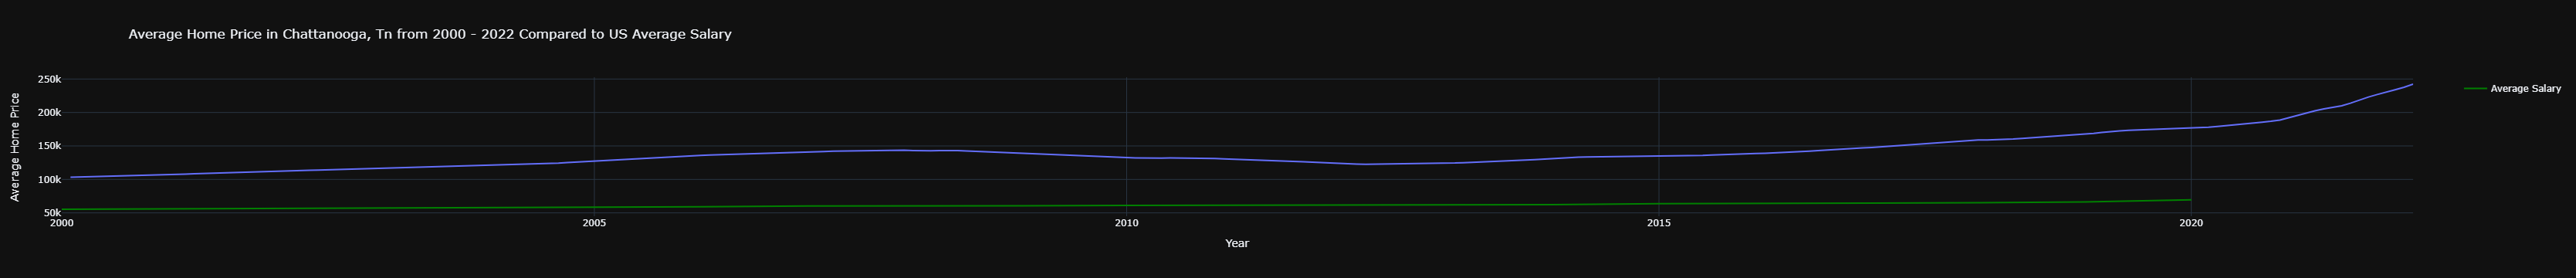

In [36]:
fig = px.line(df, y = 'price',title = 'Average Home Price in Chattanooga, Tn from 2000 - 2022 Compared to US Average Salary',template='plotly_dark' ) #using plotly express we are plotting the zillow df with y being the average home price.
fig.update_yaxes(title_text='Average Home Price') #changing the names of the x and y axes
fig.update_xaxes(title_text='Year')
fig.add_trace( #this is probably not the right way to do this programatically but it works. I simply added a new line to our plt with each point being (year,avg salary)
    go.Scatter(
        x=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
        y=[55365.7026,55834.59927,56274.65937,56965.56372,58023.42994,58092.35167,59013.85988,60187.98475,59986.26589,60471.10851,61047.87423,61131.68,61634.20103,61346.90941,62263.41036,63844.55577,63941.85704,64618.45226,65302.94014,66382.50555,69391.80642],
        mode="lines",
        line=go.scatter.Line(color="green"), name = 'Average Salary')) #adding a name to the trace 

fig.show()